# Zadanie 9 (10 pkt)
### Deadline 03.02 o 23:59

Na podstawie zbioru https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data **dokonaj klasteryzacji różnych rodzajów noclegów oferowanych przez Airbnb**. 

Proponowane zmienne do klasteryzacji:

- latitude
- longitude
- price
- minimum nights
- number of reviews lub number of reviews per month

**Proszę o wybranie minimum 4 zmiennych.** Klasteryzacja pozwoli na znalezienie obiektów położonych w podobnym miejscu i o zbliżonych cenach i warunkach.

Należy wyznaczyć **optymalną liczbę klastrów z graficznym objaśnieniem**. Trzeba pamiętać o **zachowaniu poprawności założeń** (np. standaryzacja zmiennych).


# Powodzenia!

In [398]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact,Dropdown, FloatSlider
from traitlets import directional_link
from IPython.display import display

from sklearn.preprocessing import StandardScaler, MinMaxScaler,QuantileTransformer, PowerTransformer, RobustScaler

from sklearn.cluster import KMeans
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')
sns.set()


In [399]:
df = pd.read_csv("AB_NYC_2019.csv")

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [401]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [402]:
# Duplicates
df.duplicated().sum()

0

In [403]:
# Null values
for column in df.columns:
    missing = df[column].isna().sum()
    print(f"{column:{25}}: ==============> {missing}")

id                       : ==============> 0
name                     : ==============> 16
host_id                  : ==============> 0
host_name                : ==============> 21
neighbourhood_group      : ==============> 0
neighbourhood            : ==============> 0
latitude                 : ==============> 0
longitude                : ==============> 0
room_type                : ==============> 0
price                    : ==============> 0
minimum_nights           : ==============> 0
number_of_reviews        : ==============> 0
last_review              : ==============> 10052
reviews_per_month        : ==============> 10052
calculated_host_listings_count: ==============> 0
availability_365         : ==============> 0


Kolumny z brakami danych są jednocześnie tymi, których nie użyję do dalszej analizy - usuwam je ze zbioru

In [404]:
df = df.drop(['id', 'host_id', 'name', 'host_name', 'last_review', 'reviews_per_month'], axis=1)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


In [406]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [407]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [408]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [409]:
sns.countplot(data=df, x="neighbourhood_group", hue='room_type')
pass

In [410]:
sns.countplot(x=df["room_type"])
pass

In [424]:
numerical_columns = [column for column in df.columns if df[column].dtype in ["float64", "int64"]]
numerical_columns

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

In [413]:
categorical_columns = [column for column in df.columns if df[column].dtype in ["object"]]
categorical_columns

['neighbourhood_group', 'neighbourhood', 'room_type']

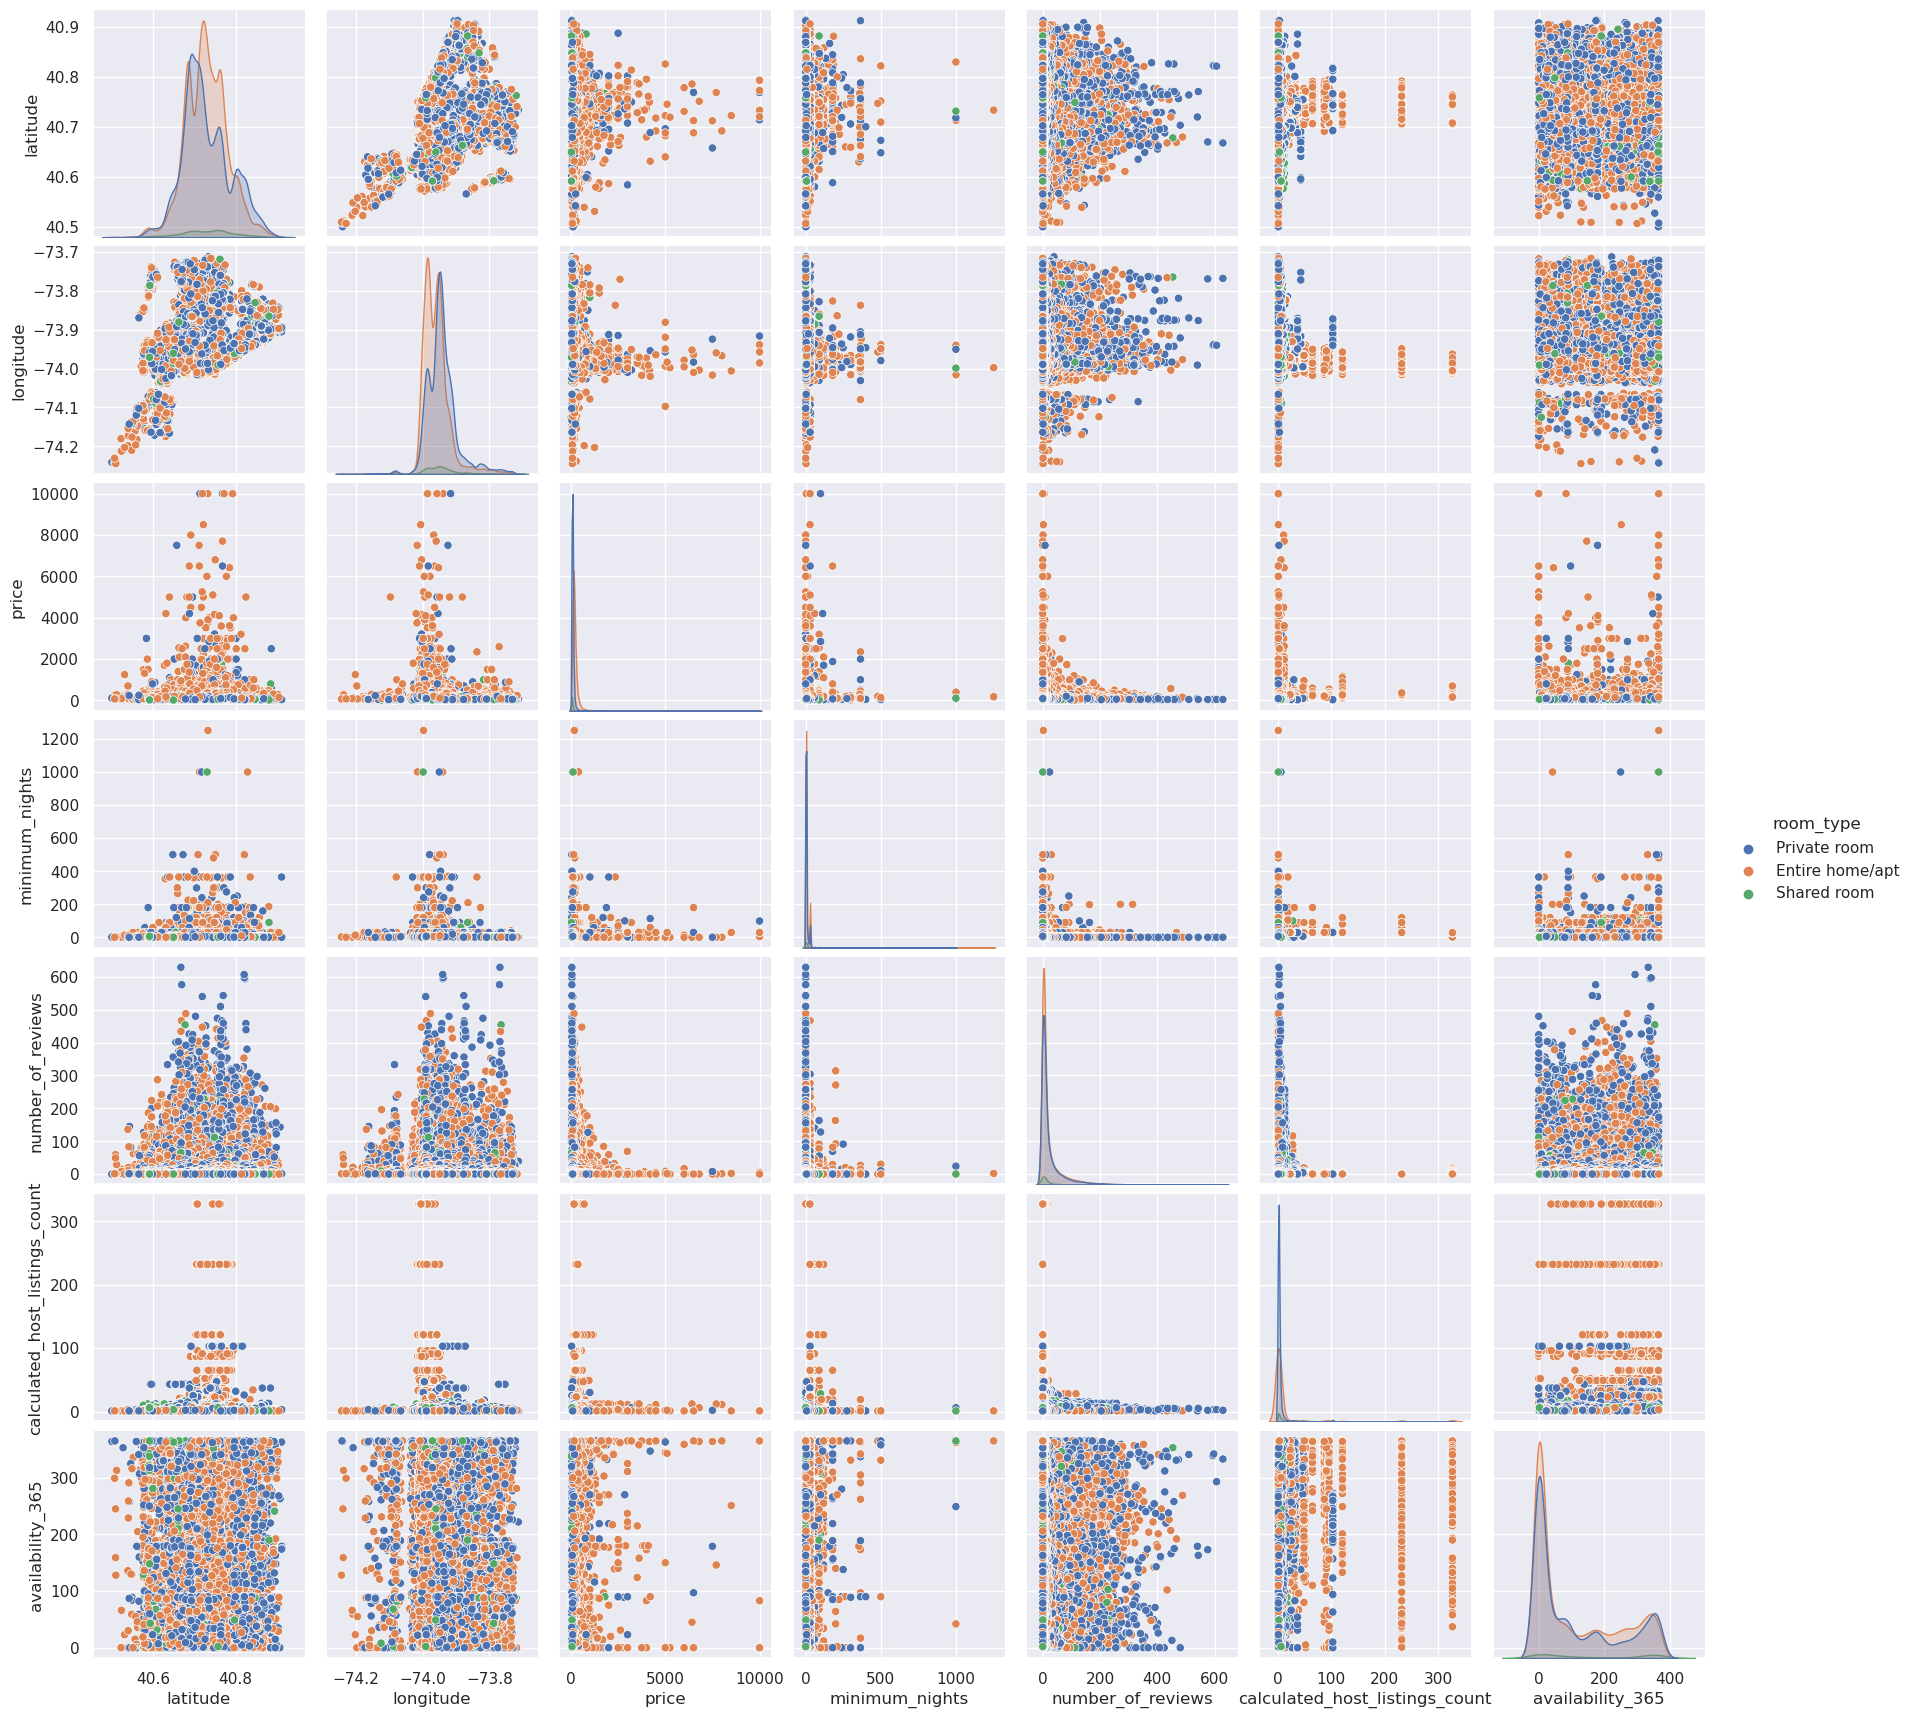

In [101]:
sns.pairplot(df, hue ='room_type')

In [102]:
sns.pairplot(df, hue ='neighbourhood_group')

In [437]:
# Boxplots
features = numerical_columns
target = 'room_type'

def draw_boxplot(df, features, target):

    if len(features)%4 !=0:
        nrows = (len(features))//4+1
    else:
        nrows = int((len(features))/4)

    fig, axes = plt.subplots(nrows, 4,figsize=(20, nrows*5))
    fig.suptitle(f'Variables (features) distribution for target categories')
    
    row=0
    i=0
    
    for feature in features:
        if nrows != 1:
            sns.boxplot(data=df, x=target, y=feature, showmeans=True, meanprops={"markeredgecolor": "yellow"},ax=axes[row,i])
            i += 1
            if i > 3 and nrows != 1:
                i = 0
                row += 1
        else:
            sns.boxplot(data=df, x=target, y=feature, showmeans=True, meanprops={"markeredgecolor": "yellow"},ax=axes[i])
            i += 1
    plt.tight_layout()
    plt.show()
    
draw_boxplot(df, features, target)

In [104]:
df.groupby('room_type')[numerical_columns].describe().T

room_type                             Entire home/apt  Private room  \
latitude                       count     25409.000000  22326.000000   
                               mean         40.728649     40.729208   
                               std           0.050619      0.058214   
                               min          40.506410     40.499790   
                               25%          40.691260     40.689270   
                               50%          40.726730     40.717765   
                               75%          40.761810     40.764657   
                               max          40.905270     40.913060   
longitude                      count     25409.000000  22326.000000   
                               mean        -73.960696    -73.942924   
                               std           0.042551      0.048025   
                               min         -74.244420    -74.242850   
                               25%         -73.987410    -73.969890   
                               50%         -73.964870    -73.948105   
                               75%         -73.944800    -73.925185   
                               max         -73.716900    -73.712990   
price                          count     25409.000000  22326.000000   
                               mean        211.794246     89.780973   
                               std         284.041611    160.205262   
                               min           0.000000      0.000000   
                               25%         120.000000     50.000000   
                               50%         160.000000     70.000000   
                               75%         229.000000     95.000000   
                               max       10000.000000  10000.000000   
minimum_nights                 count     25409.000000  22326.000000   
                               mean          8.506907      5.377900   
                               std          22.947336     16.292091   
                               min           1.000000      1.000000   
                               25%           2.000000      1.000000   
                               50%           3.000000      2.000000   
                               75%           5.000000      4.000000   
                               max        1250.000000    999.000000   
number_of_reviews              count     25409.000000  22326.000000   
                               mean         22.842418     24.112962   
                               std          42.408837     47.286746   
                               min           0.000000      0.000000   
                               25%           1.000000      1.000000   
                               50%           5.000000      5.000000   
                               75%          23.000000     25.000000   
                               max         488.000000    629.000000   
calculated_host_listings_count count     25409.000000  22326.000000   
                               mean         10.698335      3.227717   
                               std          44.381193     10.218641   
                               min           1.000000      1.000000   
                               25%           1.000000      1.000000   
                               50%           1.000000      1.000000   
                               75%           2.000000      2.000000   
                               max         327.000000    327.000000   
availability_365               count     25409.000000  22326.000000   
                               mean        111.920304    111.203933   
                               std         129.802937    132.092065   
                               min           0.000000      0.000000   
                               25%           0.000000      0.000000   
                               50%          42.000000     45.000000   
                               75%         229.000000    214.000000   
                        

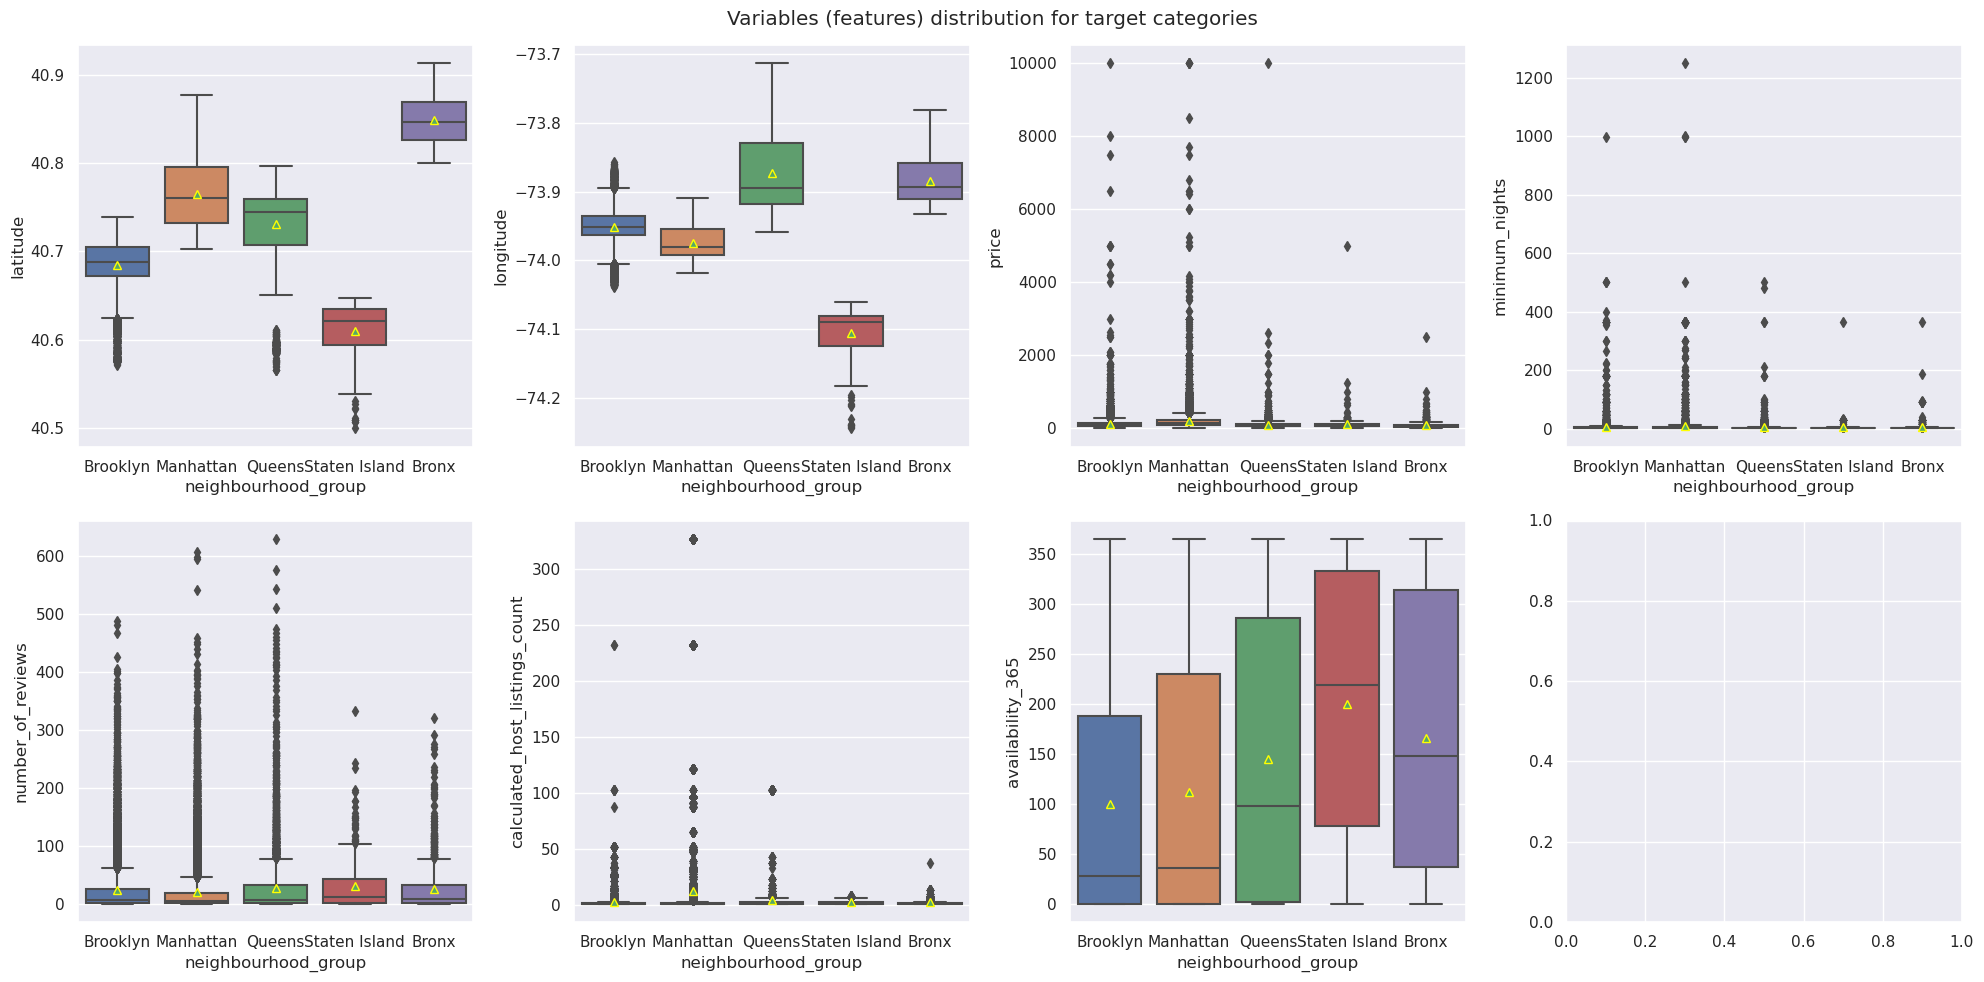

In [105]:
features = numerical_columns
target = 'neighbourhood_group'
draw_boxplot(df, features, target)

In [106]:
df.groupby('neighbourhood_group')[numerical_columns].describe().T

neighbourhood_group                         Bronx      Brooklyn     Manhattan  \
latitude                       count  1091.000000  20104.000000  21661.000000   
                               mean     40.848305     40.685036     40.765062   
                               std       0.026717      0.027397      0.038463   
                               min      40.800110     40.571150     40.702340   
                               25%      40.826645     40.672590     40.731820   
                               50%      40.846150     40.687520     40.760880   
                               75%      40.869605     40.704963     40.795090   
                               max      40.913060     40.738900     40.876650   
longitude                      count  1091.000000  20104.000000  21661.000000   
                               mean    -73.884552    -73.951190    -73.974607   
                               std       0.032818      0.025482      0.022138   
                               min     -73.931900    -74.039420    -74.018510   
                               25%     -73.911055    -73.963500    -73.991690   
                               50%     -73.892540    -73.951740    -73.980420   
                               75%     -73.858425    -73.935908    -73.953840   
                               max     -73.781580    -73.856760    -73.908550   
price                          count  1091.000000  20104.000000  21661.000000   
                               mean     87.496792    124.383207    196.875814   
                               std     106.709349    186.873538    291.383183   
                               min       0.000000      0.000000      0.000000   
                               25%      45.000000     60.000000     95.000000   
                               50%      65.000000     90.000000    150.000000   
                               75%      99.000000    150.000000    220.000000   
                               max    2500.000000  10000.000000  10000.000000   
minimum_nights                 count  1091.000000  20104.000000  21661.000000   
                               mean      4.560953      6.056556      8.579151   
                               std      15.631792     17.632726     24.050857   
                               min       1.000000      1.000000      1.000000   
                               25%       1.000000      2.000000      1.000000   
                               50%       2.000000      3.000000      3.000000   
                               75%       3.000000      5.000000      6.000000   
                               max     365.000000    999.000000   1250.000000   
number_of_reviews              count  1091.000000  20104.000000  21661.000000   
                               mean     26.004583     24.202845     20.985596   
                               std      42.214774     44.344868     42.572277   
                               min       0.000000      0.000000      0.000000   
                               25%       1.000000      1.000000      1.000000   
                               50%       9.000000      6.000000      4.000000   
                               75%      32.000000     25.000000     19.000000   
                               max     321.000000    488.000000    607.000000   
calculated_host_listings_count count  1091.000000  20104.000000  21661.000000   
                               mean      2.233731      2.284371     12.791330   
                               std       2.370576      5.273758     48.234766   
                               min       1.000000      1.000000      1.000000   
                               25%       1.000000      1.000000      1.000000   
                               50%       1.000000      1.000000      1.000000   
                               75%       2.000000      2.000000      2.000000   
                               max      37.000000    232.000000    327.000000   
availability_365               

* Średnie poszczególnych zmiennych numerycznych różnicują się ze względu na kategorię 'room_type' i 'neighbourhood_group', przy czym dla drugiej różnice te są znacznie wyraźniejsze.
* Dane naturalnie grupują się dla dzielnic (wartości długości i szerokości geograficznej wyznaczają ich granice)


# Outliers

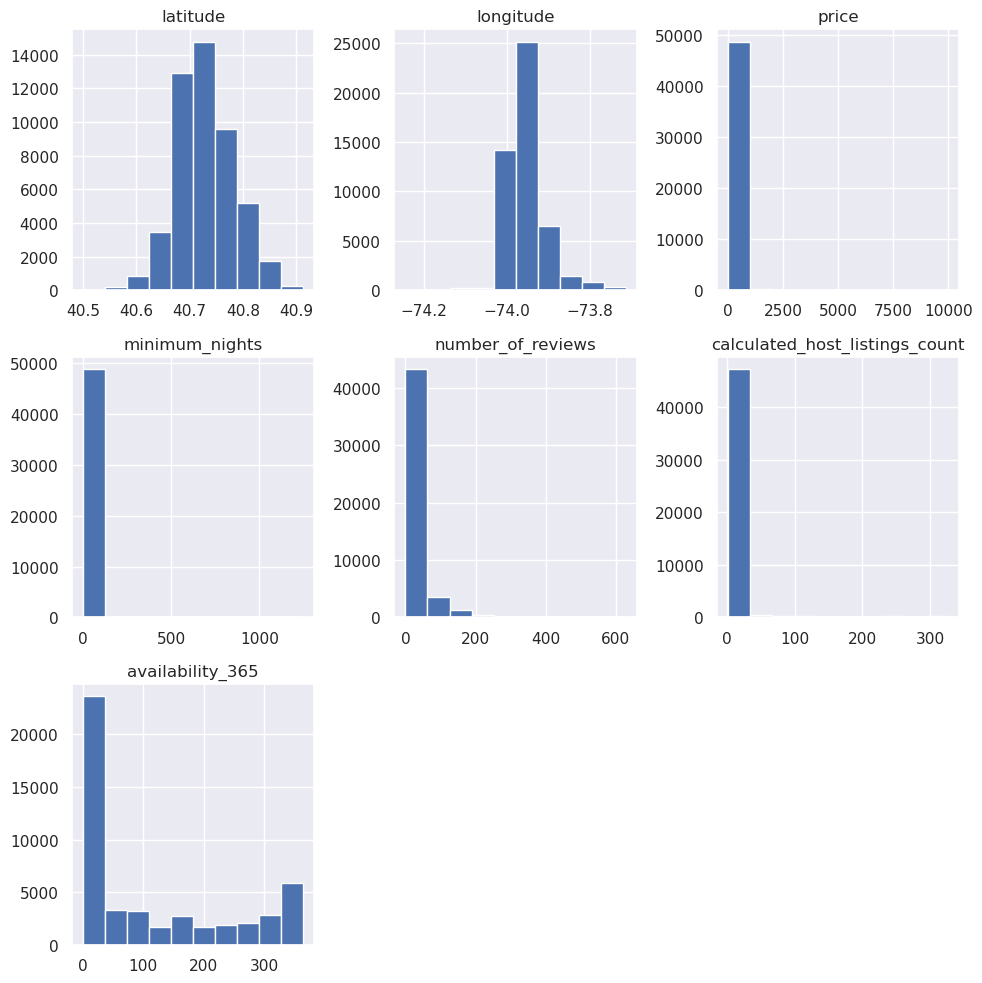

In [300]:
df.hist(figsize=(10,10)) 
plt.tight_layout()
plt.show()

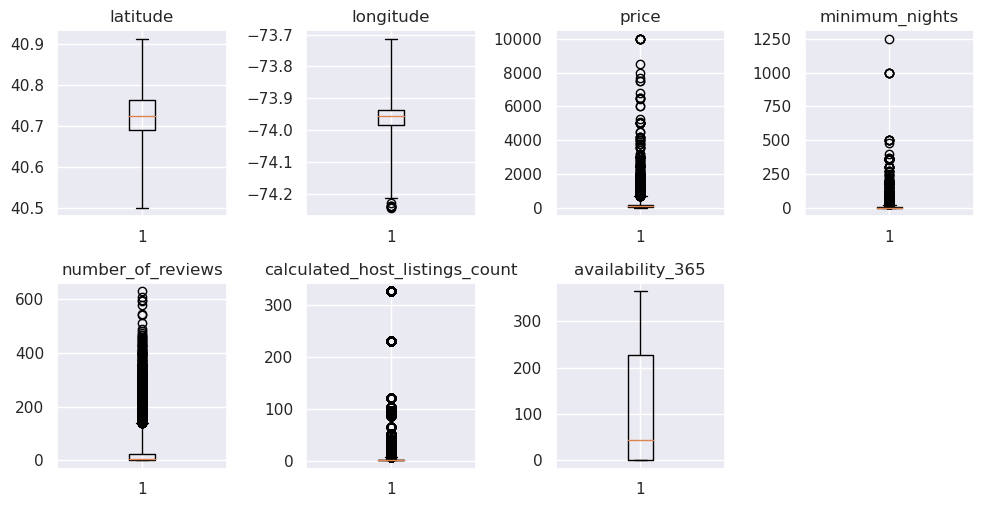

In [301]:
i = 1
plt.figure(figsize=(10,10))
for var in numerical_columns:
   plt.subplot(4,4,i)
   plt.boxplot(df[var],whis=5)
   plt.title(var)
   i+=1
plt.tight_layout()
plt.show()

* Usuwam wartości odstające dla 4 kolumn

In [ ]:
# Metoda I - usunięcie wartości odstający 
# Metoda II - pozostawienie wartości 

In [302]:
def drop_outliers(df, columns):
    for column in columns:
        iqr = 1.5 * (np.percentile(df[column], 75) - np.percentile(df[column], 25))
        df.drop(df[df[column] > (iqr + np.percentile(df[column], 75))].index, inplace=True)
        df.drop(df[df[column] < (np.percentile(df[column], 25) - iqr)].index, inplace=True)

df2 = df.copy()

drop_outliers(df2, ['price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count'])

 

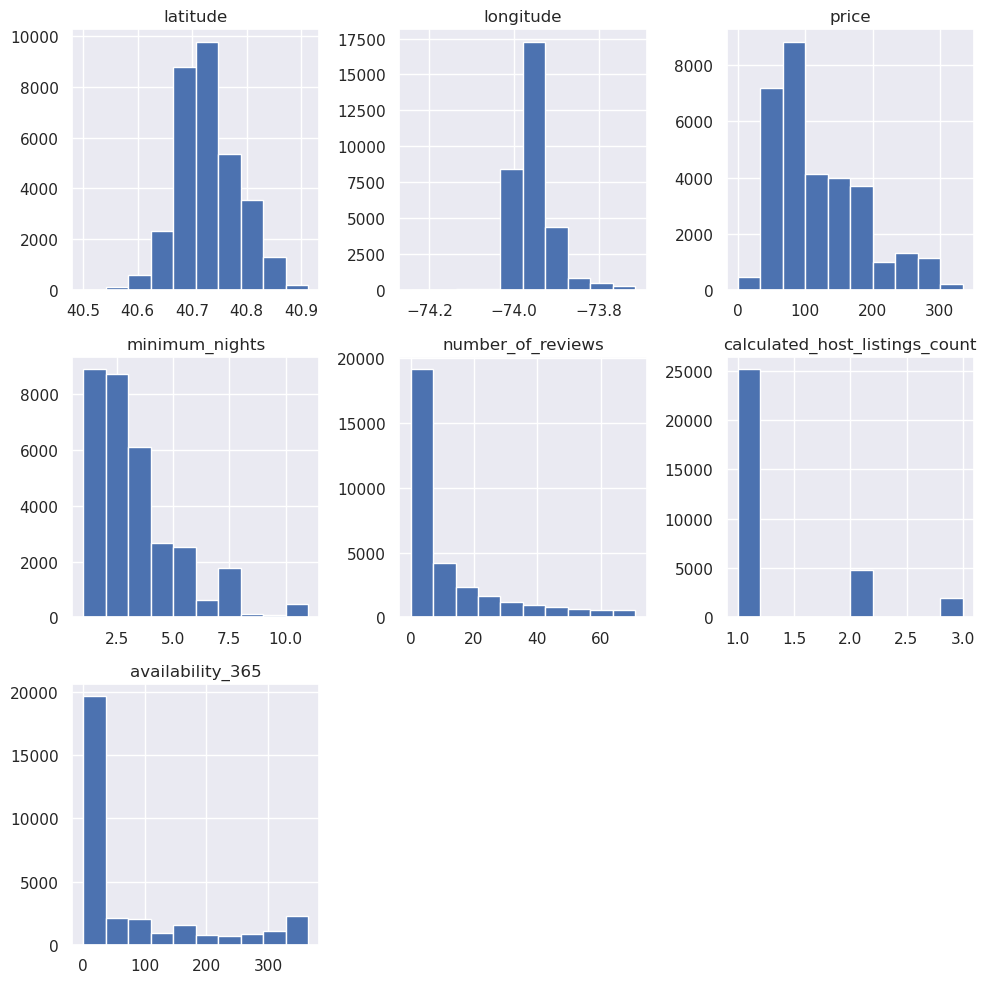

In [303]:
df2.hist(figsize=(10,10)) 
plt.tight_layout()
plt.show()

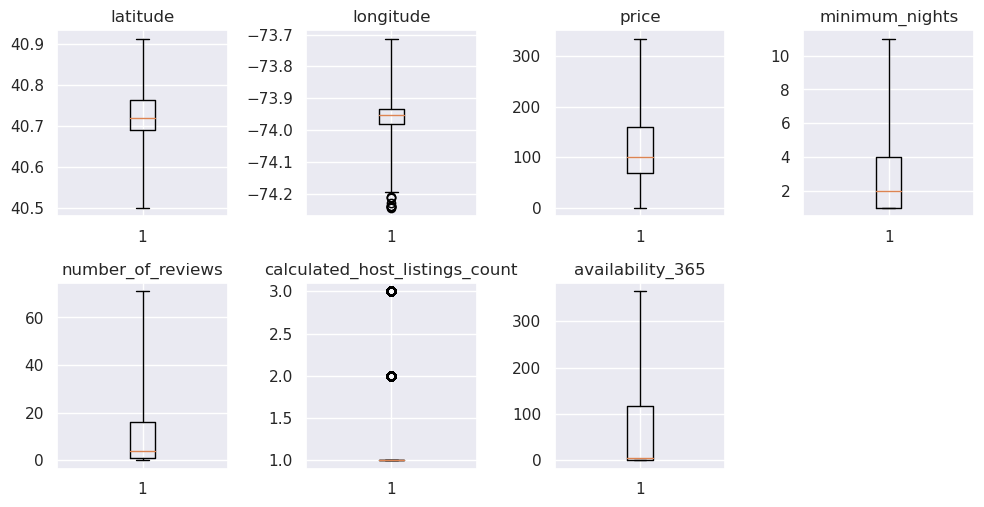

In [255]:
i = 1
plt.figure(figsize=(10,10))
for var in numerical_columns:
   plt.subplot(4,4,i)
   plt.boxplot(df2[var],whis=5)
   plt.title(var)
   i+=1
plt.tight_layout()
plt.show()

Wybór cech

In [381]:
# df_pr = df[df['room_type'] == 'Private room']
# df_shr = df[df['room_type'] == 'Private room']
# df_eh = df[df['room_type'] == 'Entire home/apt']

features = ['latitude','longitude','price', 'availability_365']
# df_c=df[features] # with outliers 
df2_c=df2[features] # without outliers 

# Data Scaling

In [335]:
scaling_models = {
'standard_scaler' : StandardScaler(),
'min_max_scaler' : MinMaxScaler(),
'robust_scaler' : RobustScaler(),
'quantile_transformer_normal' : QuantileTransformer(output_distribution='normal'),
'power_transformer_YeoJohnson' : PowerTransformer(method='yeo-johnson'),}

In [322]:
def scale_dataset (df:pd.DataFrame,scalers:list): 
    
    scaled_datasets = {}
    scaled_datasets['unscaled'] = df
    for scaler in scalers:
        values = df.values
        names = df.columns
        dataframe_name = str('df_' + scaler)
        model = scaling_models[scaler]
        values_scaled = model.fit_transform(values)
        scaled_df = pd.DataFrame(values_scaled)
        scaled_df.columns = names
        scaled_datasets[dataframe_name] = pd.DataFrame(scaled_df)

    return scaled_datasets

In [358]:
# scaled_datasets = scale_dataset(df_c,list(scaling_models.keys()))
scaled_datasets_2 = scale_dataset(df2_c,list(scaling_models.keys()))

In [337]:
def plot_scaled_dataframe(scaled_datasets):
    
    n= widgets.Dropdown(options=scaled_datasets.keys(),
                        value = 'unscaled',
                        description="Select dataframe: ")

    def draw_plot(dataframe):
        
        scaled_datasets[dataframe].hist(figsize=(10,10)) 
        plt.tight_layout()
        plt.show()

    out = widgets.interactive_output(draw_plot,{'dataframe':n})

    display(n,out)

In [359]:
plot_scaled_dataframe(scaled_datasets_2)

Dropdown(description='Select dataframe: ', options=('unscaled', 'df_standard_scaler', 'df_min_max_scaler', 'df…

Output()

In [379]:
# df_c_scaled = scaled_datasets['df_min_max_scaler']
df2_c_scaled = scaled_datasets_2['df_min_max_scaler']

# df_c_scaled = scaled_datasets['df_power_transformer_YeoJohnson']
# df_c2_scaled = scaled_datasets_2['df_power_transformer_YeoJohnson']

# df_c_scaled = scaled_datasets['df_quantile_transformer_normal']
# df_c2_scaled = scaled_datasets_2['df_quantile_transformer_normal']

# Clustering

In [361]:
# Multivariate clustering - 4 features
clustering=KMeans(init='k-means++', random_state=0)
clustering.fit(df2_c_scaled)
clusters = df2_c_scaled.copy()
clusters["cluster_predicted"]=clustering.labels_
clusters.head()

latitude  longitude     price  availability_365  cluster_predicted
0  0.614199   0.490469  0.673653          0.972603                  1
1  0.748252   0.569257  0.449102          1.000000                  1
2  0.722820   0.565324  0.239521          0.000000                  0
3  0.734072   0.524942  0.404192          0.016438                  0
4  0.426186   0.559773  0.296407          0.057534                  2

In [380]:
clusters["cluster_predicted"].value_counts()

2    9059
5    6771
0    4765
7    3144
4    3039
3    2306
1    1534
6    1386
Name: cluster_predicted, dtype: int64

In [435]:
def draw_plot_clusters(column1, column2, clusters):
    
    plt.figure(figsize=(5,5))
    plt.scatter(clusters[column1],clusters[column2],c=clusters['cluster_predicted'],cmap='rainbow')
    plt.title(f"Clustering apartments based on {column1} and {column2}")
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

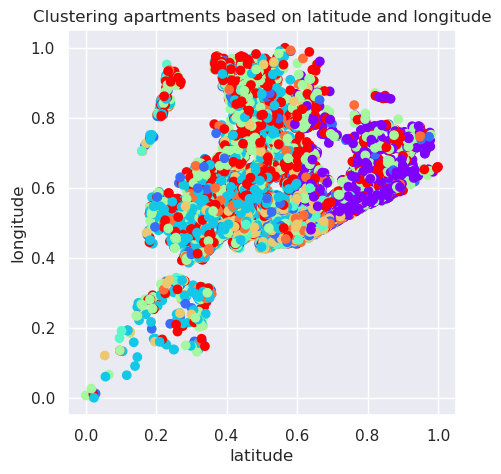

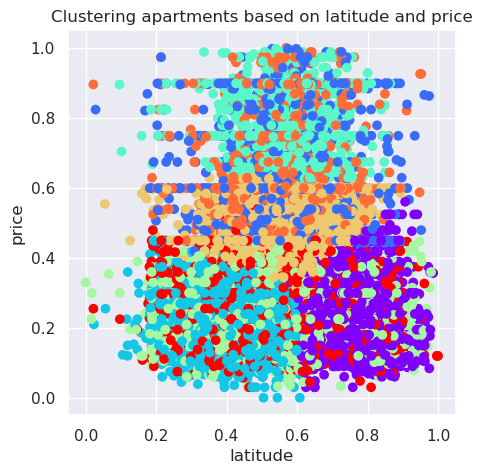

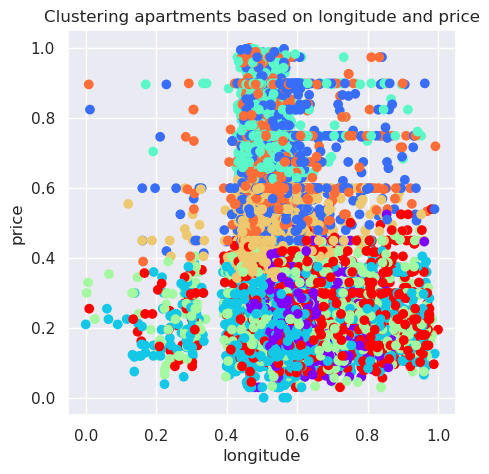

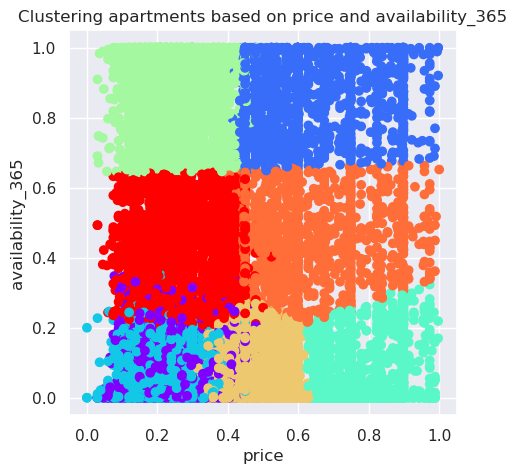

In [436]:
for i,j in combinations(features,2):
    if i!=j:
        draw_plot_clusters(i, j,clusters)

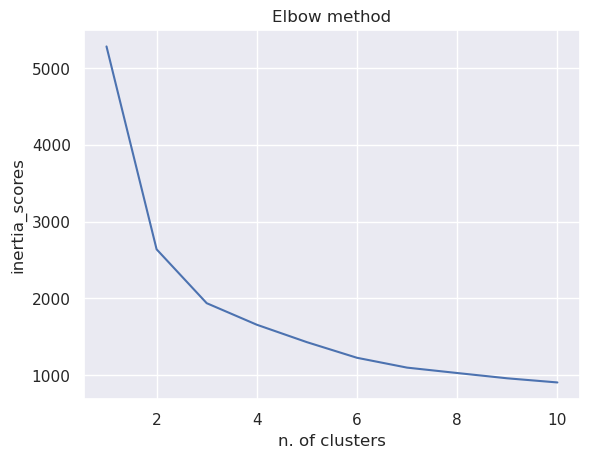

In [364]:
inertia_scores=[]

# Visualizing the elbow plot for 1-11 clusters
for i in range(1,11):
    clustering = KMeans(n_clusters= i, init='k-means++', random_state=0)
    clustering.fit(df2_c_scaled)
    inertia_scores.append(clustering.inertia_)
    
plt.plot(range(1,11), inertia_scores)
plt.title('Elbow method')
plt.xlabel('n. of clusters')
plt.ylabel('inertia_scores')
plt.show()

In [365]:
clustering2=KMeans(n_clusters= 6, init='k-means++', random_state=0)
clustering2.fit(df2_c_scaled)
clusters2 = df2_c_scaled.copy()
clusters2["cluster_predicted"]=clustering2.labels_
clusters2.head()

latitude  longitude     price  availability_365  cluster_predicted
0  0.614199   0.490469  0.673653          0.972603                  2
1  0.748252   0.569257  0.449102          1.000000                  0
2  0.722820   0.565324  0.239521          0.000000                  3
3  0.734072   0.524942  0.404192          0.016438                  3
4  0.426186   0.559773  0.296407          0.057534                  4

In [366]:
clusters2.groupby('cluster_predicted')['latitude','longitude','price','availability_365'].mean()

latitude  longitude     price  availability_365
cluster_predicted                                                 
0                  0.539974   0.591385  0.265218          0.885662
1                  0.559815   0.510435  0.608045          0.044783
2                  0.558074   0.532529  0.690609          0.729701
3                  0.722814   0.568450  0.264755          0.037916
4                  0.467516   0.550156  0.239609          0.027566
5                  0.532796   0.588989  0.293909          0.404754

In [367]:
df2_labeled = df2.copy()
df2_labeled['cluster']=clustering2.labels_

In [370]:
df2_labeled.groupby('cluster')[features].mean()

latitude  longitude       price  availability_365
cluster                                                    
0        40.722945 -73.930140   88.582888        323.266786
1        40.731145 -73.973159  203.086963         16.345624
2        40.730425 -73.961418  230.663340        266.340861
3        40.798507 -73.942329   88.428235         13.839276
4        40.693001 -73.952051   80.029480         10.061561
5        40.719978 -73.931414   98.165568        147.735310

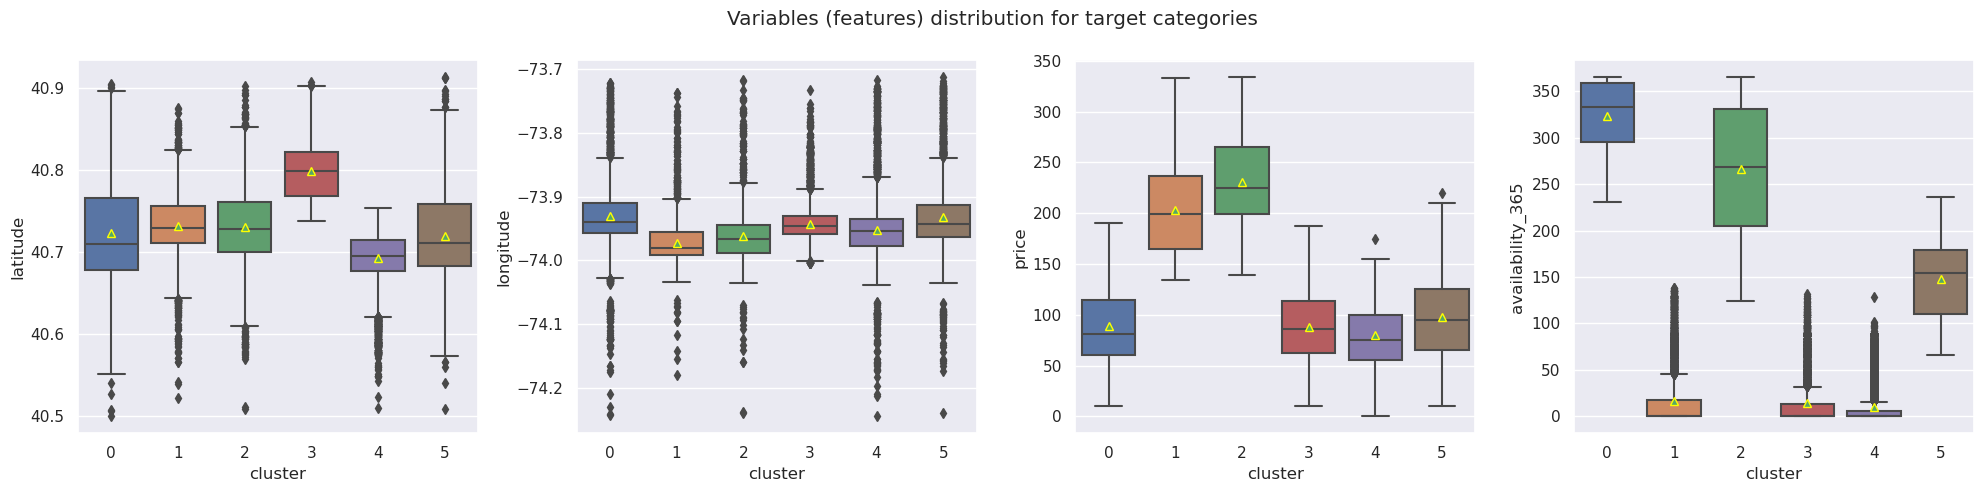

In [423]:
target = 'cluster'
features = ['latitude','longitude','price', 'availability_365']
draw_boxplot(df2_labeled, features, target)

* Optymalna liczba klastrów wyniosła 6. 
* Dla wybranych czterech parametrów główny wpływ na utowrzenie klastrów miały zróżnicowane wartości ceny i dostępności apartamentów. Przykładowo, klaster '0' to dostępne przez cały rok, stosunkowo tanie mieszakania/pokoje,a grupa '1' to drogie i przez dłuższy czas niedostępne lokalizacje. 
* Duży wpływ na jakość podziału danych ma usunięcie wartości odbiegających i wybór metody skalowania. Dla zadanego zbioru danych usunięcie outlierów pozwoliło na wyodrębnienie grup, które można łatwo zinterpretować.
